Predicting Salaries with Decision Trees
=======================================


Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree


In [3]:
attribute_names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'salary_class'
]


Read a CSV data file.

In [4]:
df = pd.read_csv('adult.data', names=attribute_names, sep=',', engine='python')
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Pre-process the data.  First, remove unwanted variables.

In [5]:
excludes = [
    'fnlwgt', 
    'education_num',
    'capital_gain', 
    'capital_loss'
]

df_clean = df[[x for x in df.columns if x not in excludes]]
df_clean.head(5)

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,salary_class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


Boolean variables to 0s and 1s.

In [6]:
booleans = [
    'sex', 
    'native_country', 
    'salary_class'
]

df_clean = df_clean.assign(sex = df_clean['sex'].astype('category').cat.codes,
                          native_country = df_clean['native_country'].astype('category').cat.codes,
                          salary_class = df_clean['salary_class'].astype('category').cat.codes)
    
df_clean.head(5)

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,salary_class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,40,39,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,13,39,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,40,39,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,39,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,5,0


 One-hot encoding of all categorical attributes.

In [7]:
categoricals = [
    'workclass', 
    'education', 
    'marital_status', 
    'occupation', 
    'relationship', 
    'race'
]

for att in categoricals:
    df_clean = pd.concat([df_clean, pd.get_dummies(df_clean[att], prefix=att)], axis=1)
    del df_clean[att]
    
df_clean.head(5)

,age,sex,hours_per_week,native_country,salary_class,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,1,40,39,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,1,13,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,1,40,39,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,53,1,40,39,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,5,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


Extract attributes (X) and class labels (y).

In [8]:
y = df_clean['salary_class']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: salary_class, dtype: int8

In [9]:
X = df_clean.drop('salary_class', axis=1)
X.head(5)

,age,sex,hours_per_week,native_country,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,1,40,39,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,1,13,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,1,40,39,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,53,1,40,39,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,5,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


Split dataset into training and testing subsets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (21815, 62)
X_test:  (10746, 62)
y_train:  (21815,)
y_test:  (10746,)


Construct a decision tree from this training data.

In [11]:
model = DecisionTreeClassifier(
    random_state=0, 
    criterion='entropy'
)

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predict target class for the training set.

In [12]:
y_train_hat = model.predict(X_train)
# Print the first ten predicted classes of the training dataset
print(y_train_hat[0:10])
train_acc = accuracy_score(y_train, y_train_hat)
print('Training dataset accuracy: ', train_acc)

[0 1 0 0 0 0 0 0 1 0]
Training dataset accuracy:  0.9731377492550997


Predict target class for the testing set.

In [13]:
y_test_hat = model.predict(X_test)
# Print the first ten predicted classes of the test dataset
print(y_test_hat[0:10])
test_acc = accuracy_score(y_test, y_test_hat)
print('Test dataset accuracy: ', test_acc)

[0 0 0 1 0 0 0 0 0 0]
Test dataset accuracy:  0.7787083565978038


Check if dataset is balanced.

In [14]:
import sidetable
df_clean.stb.freq(['salary_class'])

,salary_class,count,percent,cumulative_count,cumulative_percent
0,0,24720,75.919044,24720,75.919044
1,1,7841,24.080956,32561,100.000000


Prune the decision tree.

Training dataset accuracy:  0.9731377492550997
Test dataset accuracy:  0.7787083565978038
Training dataset accuracy:  0.9588815035526014
Test dataset accuracy:  0.7846640610459706
Training dataset accuracy:  0.9442126976850791
Test dataset accuracy:  0.7877349711520566
Training dataset accuracy:  0.8680724272289709
Test dataset accuracy:  0.8153731621068304
Training dataset accuracy:  0.856429062571625
Test dataset accuracy:  0.8237483714870649
Training dataset accuracy:  0.8486820994728398
Test dataset accuracy:  0.8247720081890936
Training dataset accuracy:  0.8442814577125831
Test dataset accuracy:  0.8239344872510702
Training dataset accuracy:  0.8343800137520055
Test dataset accuracy:  0.8238414293690676
Training dataset accuracy:  0.8318588127435251
Test dataset accuracy:  0.8247720081890936
Training dataset accuracy:  0.8292459316983727
Test dataset accuracy:  0.8228177926670389
Training dataset accuracy:  0.8287416914966766
Test dataset accuracy:  0.8224455611390284
Training da

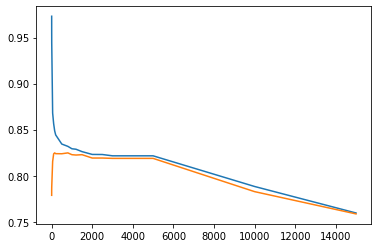

In [18]:
sizes = [2, 3, 5, 50, 100, 150, 200, 500, 800, 1000, 1200, 1500, 2000, 2500, 3000, 5000, 10000, 15000]

train_accs =[]
test_accs = []

for s in sizes:
    model = DecisionTreeClassifier(
        random_state=0, 
        criterion='entropy', 
        min_samples_split=s
    )
    
    model.fit(X_train, y_train)
    
    y_train_hat = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_hat)
    print('Training dataset accuracy: ', train_acc)
    train_accs.append(train_acc)
    
    y_test_hat = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_hat)
    print('Test dataset accuracy: ', test_acc)
    test_accs.append(test_acc)
    
plt.plot(sizes, train_accs)
plt.plot(sizes, test_accs)
plt.show()

Graphical representation of a decision tree.

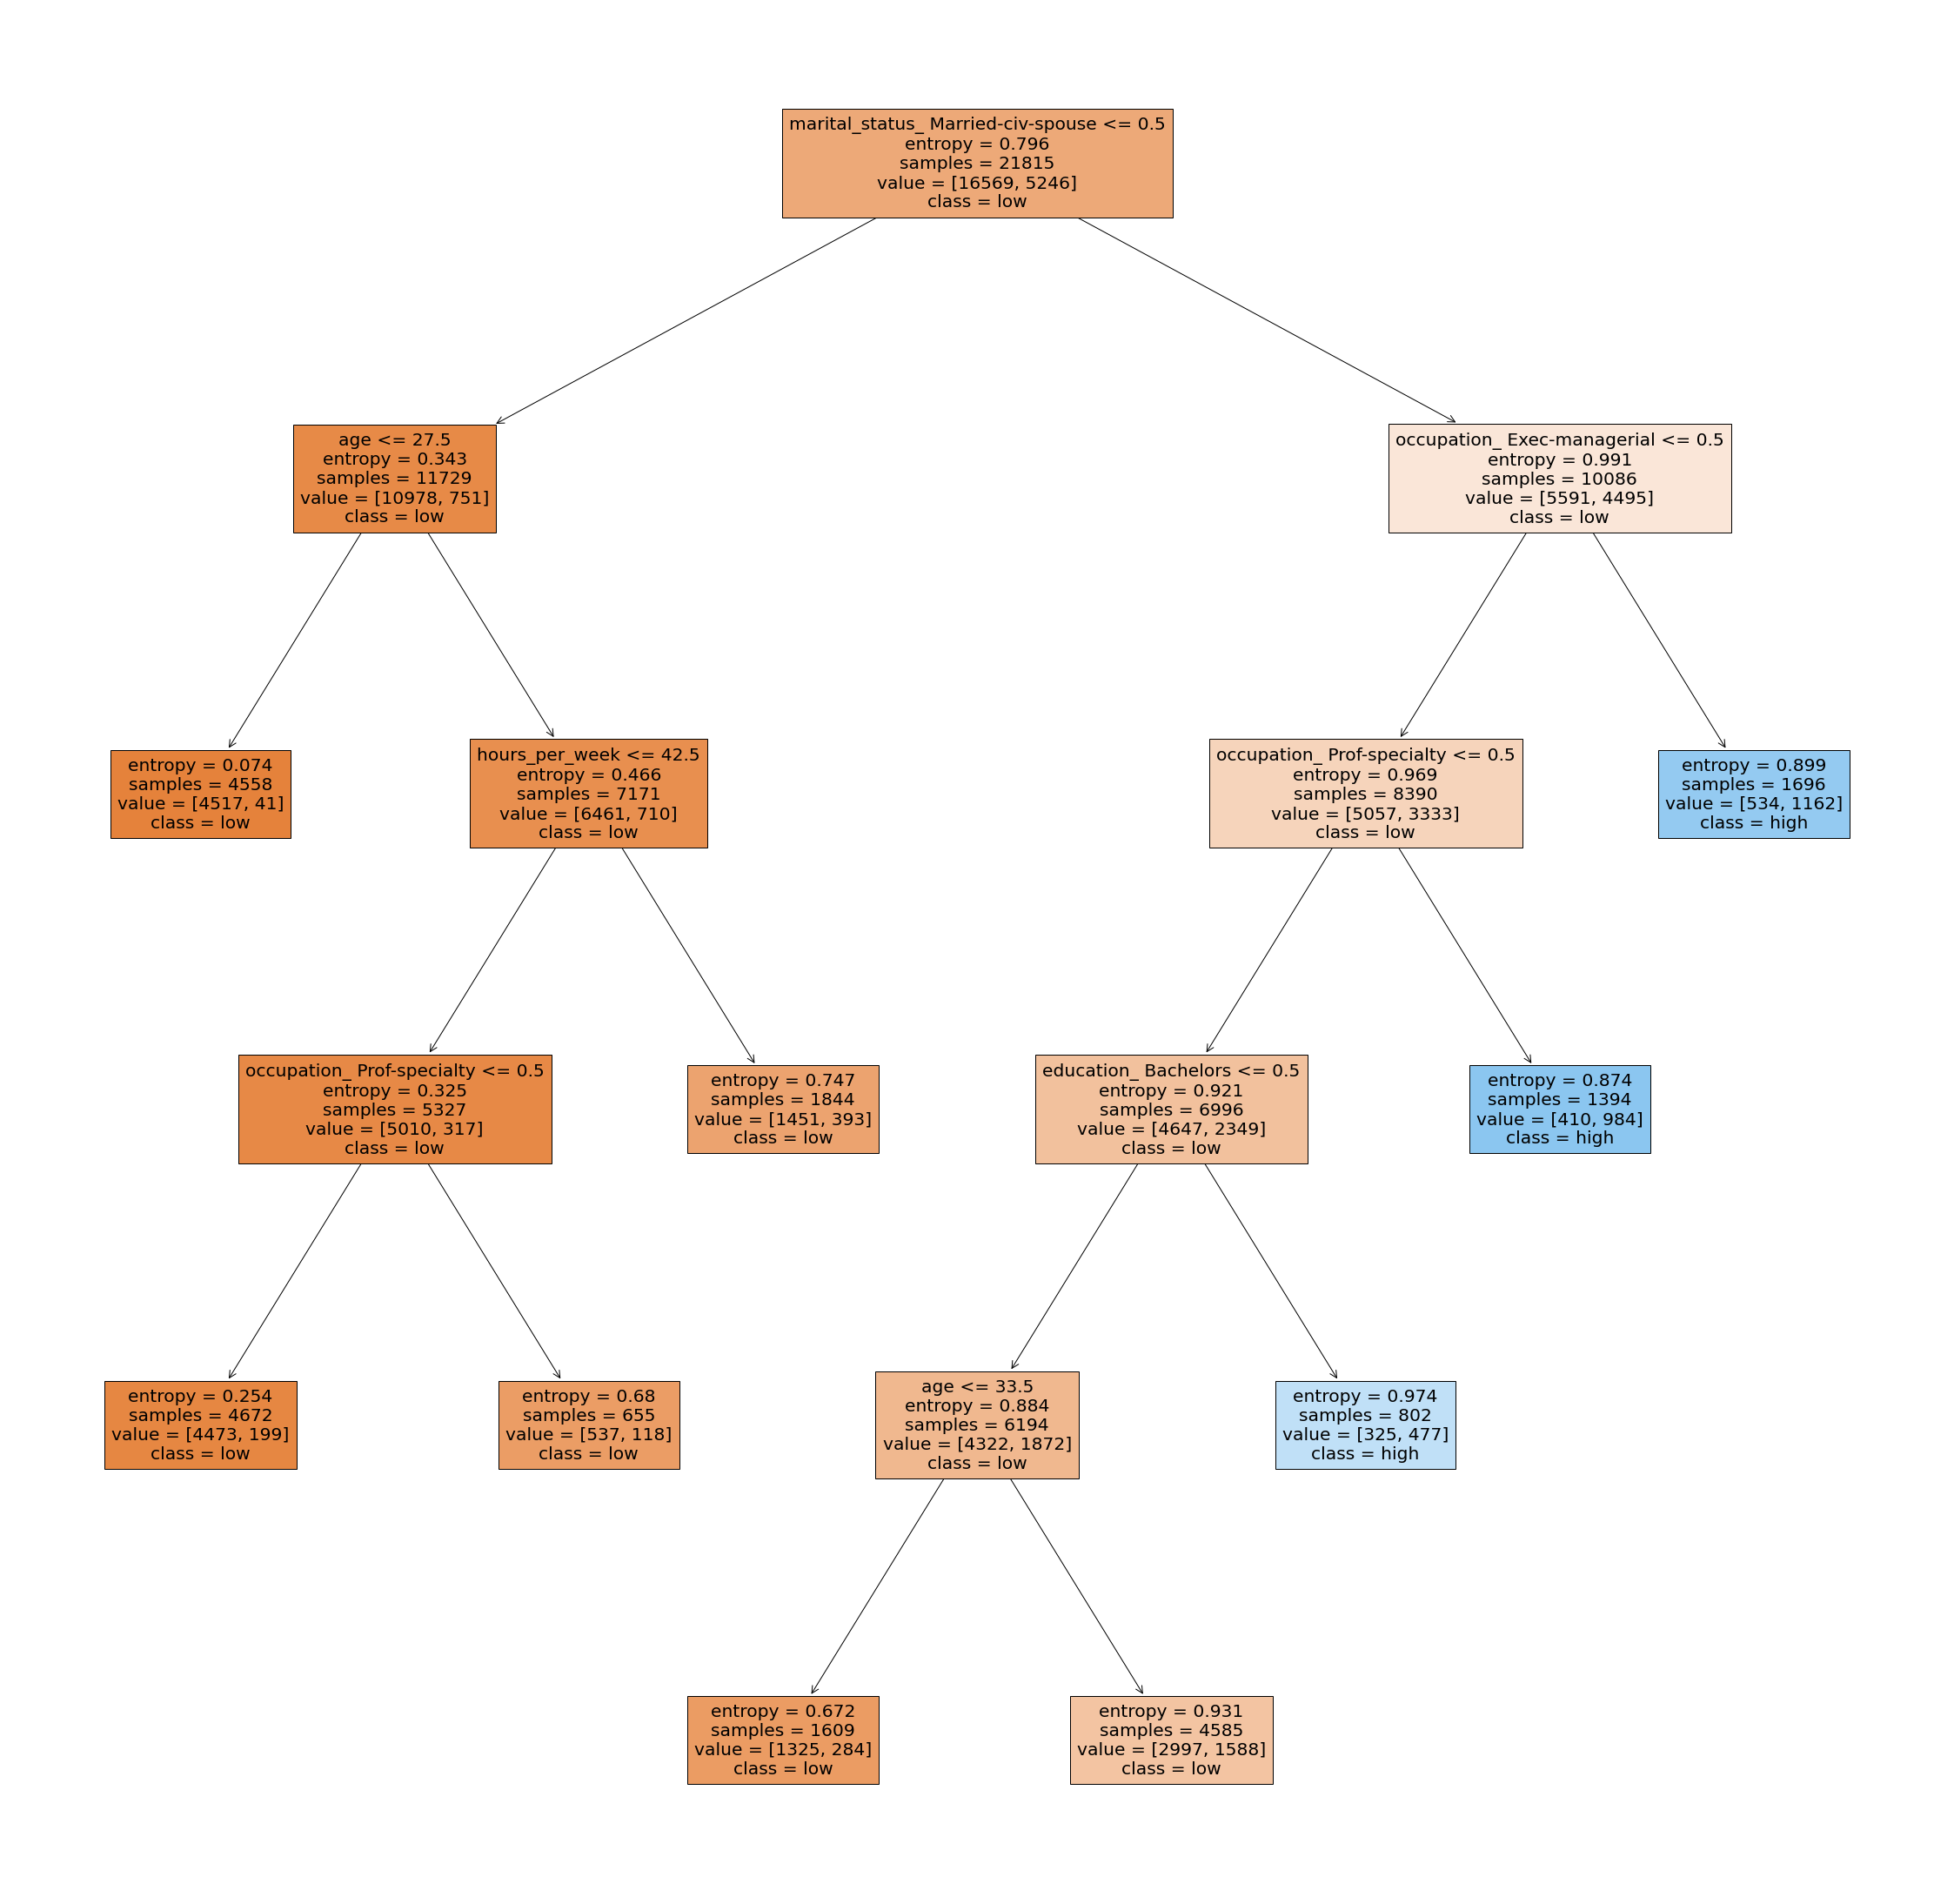

In [20]:
model = DecisionTreeClassifier(
    random_state=0, 
    criterion='entropy', 
    min_samples_split=5000
)

model.fit(X_train, y_train)

fig = plt.figure(figsize = (40, 40))
p = tree.plot_tree(
    model,
    filled = True,
    feature_names = X_train.columns.to_list(),
    class_names = ('low', 'high')
)
fig.savefig('desicion_tree.png')